# **EXPLORATORY DATA ANALYSIS(terrorism)**

# DATA PREPROCESSING

In [37]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import MarkerCluster
data=pd.read_csv('globalterrorism.csv',encoding='latin=1')
data

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region  ... addnotes  \
0            58  Dominican Republic       2  ...      NaN   
1           130              Mexico       1  ...      NaN   
2           160         Philippines       5  ...      NaN   
3            78              Greece       8  ...      NaN   
4           101               Japan       4  ...      NaN   
...         ...                 ...     ...  ...      ...   
181686      182             Somalia      11  ...      NaN   
181687      200               Syria      10  ...      NaN   
181688      160         Philippines       5  ...      NaN   
181689       92               India       6  ...      NaN   
181690      160         Philippines       5  ...      NaN   

                                                   scite1  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Somalia: Al-Shabaab Militants Attack Army Che...   
181687  "Putin's 'victory' in Syria has turned into a ...   
181688  "Maguindanao clashes trap tribe members," Phil...   
181689  "Trader escapes grenade attack in Imphal," Bus...   
181690  "Security tightened in Cotabato following IED ...   

                                                   scite2  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Highlights: Somalia Daily Media Highlights 2 ...   
181687  "Two Russian soldiers killed at Hmeymim base i...   
181688                                                NaN   
181689                                                NaN   
181690  "Security tightened in Cotabato City," Manila ...   

                                                   scite3  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Highlights: Somalia Daily Media Highlights 1 ...   
181687  "Two Russian servicemen killed in Syria mortar...   
181688                                                NaN   
181689                                                NaN   
181690                                                NaN   

                        dbsource  INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0                           PGIS        0         0        0       0      Na

In [39]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [40]:
data.shape

(181691, 135)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


***STATISICAL APROACH OF THE DATA***

In [42]:
data.describe()

eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       5.000000      11.510046   
50%         0.000000      98.000000       6.000000      31.467463   
75%         0.000000     160.000000      10.000000      34.685087   
max         1.000000    1004.000000      12.000000      74.633553   

          longitude    specificity  ...     ransomamt   ransomamtus  \
count  1.771340e+05  181685.000000  ...  1.350000e+03  5.630000e+02   
mean  -4.586957e+02       1.451452  ...  3.172530e+06  5.784865e+05   
std    2.047790e+05       0.995430  ...  3.021157e+07  7.077924e+06   
min   -8.618590e+07       1.000000  ... -9.900000e+01 -9.900000e+01   
25%    4.545640e+00       1.000000  ...  0.000000e+00  0.000000e+00   
50%    4.324651e+01       1.000000  ...  1.500000e+04  0.000000e+00   
75%    6.871033e+01       1.000000  ...  4.000000e+05  0.000000e+00   
max    1.793667e+02       5.000000  ...  1.000000e+09  1.320000e+08   

         ransompaid  ransompaidus  hostkidoutcome     nreleased  \
count  7.740000e+02    552.000000    10991.000000  10400.000000   
mean   7.179437e+05    240.378623        4.629242    -29.018269   
std    1.014392e+07   2940.967293        2.035360     65.720119   
min   -9.900000e+01    -99.000000        1.000000    -99.000000   
25%   -9.900000e+01      0.000000        2.000000    -99.000000   
50%    0.000000e+00      0.000000        4.000000      0.000000   
75%    1.273412e+03      0.000000        7.000000      1.000000   
max    2.750000e+08  48000.000000        7.000000   2769.000000   

             INT_LOG       INT_IDEO       INT_MISC        INT_ANY  
count  181691.000000  181691.000000  181691.000000  181691.000000  
mean       -4.543731      -4.464398       0.090010      -3.945952  
std         4.543547       4.637152       0.568457       4.691325  
min        -9.000000      -9.000000      -9.000000      -9.000000  
25%        -9.000000      -9.000000       0.000000      -9.000000  
50%        -9.000000      -9.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 77 columns]

In [64]:
data.groupby('iyear').sum()

eventid  imonth    iday  extended  country  region  \
iyear                                                                
1970    128250997891467    3908    9685        29   139865    1578   
1971     92836955370915    2784    7137         6   128491    1992   
1972    112013627541685    3935    9631         8   220168    3951   
1973     93325992410863    3021    7141        30   152606    2924   
1974    114693333521304    3849    8870        19   174313    3482   
1975    146155021951855    4911   11082        25   207978    4525   
1976    182390918662633    5983   13565        27   216055    5875   
1977    260775793055005    9291   20204        36   257299    9237   
1978    301853011816556    9981   23080        33   238225    9213   
1979    526826209956908   16006   40386        45   442349   16810   
1980    527093240706023   16833   40768        32   349381   13544   
1981    512304190055164   17195   39507        40   338945   12068   
1982    504237092514239   15904   38852        20   321614   11169   
1983    569139796427948   18365   43141        37   408916   13477   
1984    693429993096651   21473   51997        30   451100   16221   
1985    578646841371677   18913   42839        42   354449   13108   
1986    568013825559601   17867   45759        37   396228   14297   
1987    632483070403794   20572   49831        37   434017   15212   
1988    739759477336470   24096   58129        62   525821   20514   
1989    860073153796167   28881   67277        74   611800   23743   
1990    773538152022355   24552   60478        75   536646   23387   
1991    932417766175140   31831   73517        90   670741   26266   
1992   1010178414888446   34444   77019        64   718171   34942   
1994    689147695674818   20749   54664       109   527998   26139   
1995    614680049239788   20073   48234        81   365601   20931   
1996    610397120962350   19844   47695        93   329361   19608   
1997    638462510753803   21116   49316       122   347534   20588   
1998    186619439013048    6099   13986        84   127493    7122   
1999    278870162125026    9369   20241       135   235943   10454   
2000    362812855398257   12579   27717       141   295426   13187   
2001    381403584360914   12709   29866       121   271713   13778   
2002    266874833924647    7924   18191        74   156143    9720   
2003    255990584554473    6992   19195        53   153223    9136   
2004    233674479663667    7905   17626        69   130578    9089   
2005    404421387609307   12483   30425       103   245800   15900   
2006    553270972841933   15780   38597        93   304410   21771   
2007    650692583434169   22502   47794       151   383677   26230   
2008    964877550452320   32488   75695       276   573573   36760   
2009    948479786208109   30144   74025       278   528801   34911   
2010    970059348163568   32590   75309       331   562011   36484   
2011   1020818256411797   33874   77427       299   624493   39625   
2012   1714683162037459   55340  131550       318  1013684   66332   
2013   2422932717691690   83877  193930       575  1471166   94501   
2014   3404373630347862  106561  263567      1100  2133334  141936   
2015   3015544051013300   94167  235939      1036  1843706  124596   
2016   2739227742427287   86313  211833       951  1709865  115435   
2017   2198600386019947   68973  174519       748  1346778   89310   

            latitude     longitude  specificity  vicinity  ...     ransomamt  \
iyear                                                      ...                 
1970    20550.788172 -4.492082e+04        687.0         5  ...  1.887000e+06   
1971    17210.235146 -2.363352e+04        514.0         2  ...  6.800000e+05   
1972    24004.441063 -5.828724e+03        654.0         4  ...  1.823000e+07   
1973    15718.072031 -9.899455e+03        512.0         2  ...  3.731300e+07   
1974    19218.059261 -1.309857e+04        617.0         0  ...  7.302100e+07   
1975    27645.368812 -1.6

In [43]:
data.groupby('country_txt').sum()

eventid     iyear  imonth    iday  extended  country  \
country_txt                                                                  
Afghanistan  2562606314939286  25625202   84082  200828       925    50924   
Albania        15993034630848    159925     521    1363         0      400   
Algeria       548757893571702   5487397   17770   41694        89    16458   
Andorra          197407140002      1974       7      14         0        7   
Angola         99448507714521    994451    3340    6748        29     3992   
...                       ...       ...     ...     ...       ...      ...   
Yemen         673882189741703   6738599   21743   53772       328   763116   
Yugoslavia     40527964270941    405267    1234    3023         7    47705   
Zaire           9958264820307     99579     357     782         0    30200   
Zambia         12346137880424    123458     327    1088         0    14260   
Zimbabwe       20107915460760    201073     600    1541         1    23331   

             region       latitude      longitude  specificity  ...  \
country_txt                                                     ...   
Afghanistan   76386  428193.216959  849228.449642      26564.0  ...   
Albania         720    3245.119511    1567.264957         92.0  ...   
Algeria       27430   94795.602395    8891.912467       3766.0  ...   
Andorra           8       0.000000       0.000000          5.0  ...   
Angola         5489   -4682.339857    6953.661539        860.0  ...   
...             ...            ...            ...          ...  ...   
Yemen         33470   47113.128711  147927.292803       5998.0  ...   
Yugoslavia     1827    8739.870512    4115.384823        304.0  ...   
Zaire           550    -168.549553     921.534665         77.0  ...   
Zambia          682    -804.650263    1485.556860        122.0  ...   
Zimbabwe       1111   -1786.462046    2876.949180        153.0  ...   

              ransomamt  ransomamtus  ransompaid  ransompaidus  \
country_txt                                                      
Afghanistan  78380278.2     110000.0    51394.76       10000.0   
Albania             0.0          0.0        0.00           0.0   
Algeria      72913057.0   31999901.0  9033177.00         -99.0   
Andorra             0.0          0.0        0.00           0.0   
Angola              0.0          0.0        0.00           0.0   
...                 ...          ...         ...           ...   
Yemen        23092378.0          0.0  1236767.20           0.0   
Yugoslavia          0.0          0.0        0.00           0.0   
Zaire               0.0          0.0        0.00           0.0   
Zambia              0.0          0.0        0.00           0.0   
Zimbabwe            0.0          0.0        0.00           0.0   

             hostkidoutcome  nreleased  INT_LOG  INT_IDEO  INT_MISC  INT_ANY  
country_txt                                                                   
Afghanistan          5574.0   -36014.0   -43637    -42335      1818   -32662  
Albania                 0.0        0.0     -720      -720        -9     -630  
Algeria               721.0    -4202.0   -14010    -13997       -73   -13327  
Andorra                 0.0        0.0        0         1         1        1  
Angola                199.0    -2241.0     -612      -581        60     -291  
...                     ...        ...      ...       ...       ...      ...  
Yemen                1883.0   -17720.0   -10465     -9344       250    -8154  
Yugoslavia             32.0     -297.0    -1171     -1168       157      -78  
Zaire                   4.0        0.0     -330      -331        21     -180  
Zambia                  7.0      -99.0     -240      -242        11     -160  
Zimbabwe                6.0        1.0     -558      -557        18     -417  

[205 rows x 77 columns]

In [44]:
data.groupby('region_txt').sum()

eventid      iyear  imonth    iday  \
region_txt                                                                  
Australasia & Oceania           56266844473918     562648    2001    4315   
Central America & Caribbean   2053258643230968   20531900   67112  154318   
Central Asia                   112620069476242    1126163    3682    8742   
East Asia                      159989598740527    1599842    5267   13072   
Eastern Europe                1032435740002632   10324011   33925   80426   
Middle East & North Africa   10136827180258420  101364933  326040  790742   
North America                  686393830820888    6863717   21605   52979   
South America                 3777436715793610   37773082  125360  293765   
South Asia                    9033925668311816   90336283  289863  700422   
Southeast Asia                2505296028752057   25052137   80347  193754   
Sub-Saharan Africa            3523019571084397   35229030  113621  270443   
Western Europe                3309881875916930   33097736  106223  254258   

                             extended  country  region      latitude  \
region_txt                                                             
Australasia & Oceania               9    26156    3384 -6.183403e+03   
Central America & Caribbean       150   872804   20688  1.303975e+05   
Central Asia                       37    66651    3941  2.236251e+04   
East Asia                           9    75056    3208  2.716869e+04   
Eastern Europe                    197  1092447   46296  2.358474e+05   
Middle East & North Africa       2065  5880089  504740  1.619763e+06   
North America                      54   687180    3456  1.189547e+05   
South America                     816  1599690   56934 -1.439337e+05   
South Asia                       2516  4117359  269844  1.264594e+06   
Southeast Asia                    544  2072671   62425  1.046776e+05   
Sub-Saharan Africa               1692  2897436  193050  8.189272e+03   
Western Europe                    150  4589950  133112  7.805410e+05   

                                longitude  specificity  ...     ransomamt  \
region_txt                                              ...                 
Australasia & Oceania        4.142977e+04        367.0  ...  6.464360e+05   
Central America & Caribbean -8.700527e+07      16917.0  ...  5.807650e+07   
Central Asia                 2.995421e+04        755.0  ...  5.349901e+06   
East Asia                    9.692792e+04       1115.0  ...  1.687840e+07   
Eastern Europe               1.899795e+05       6535.0  ...  7.398421e+07   
Middle East & North Africa   1.891032e+06      67077.0  ...  9.960138e+08   
North America               -3.206026e+05       3688.0  ...  2.037480e+08   
South America               -1.323640e+06      28309.0  ...  6.542747e+08   
South Asia                   3.301396e+06      72561.0  ...  4.511252e+08   
Southeast Asia               1.360670e+06      21737.0  ...  3.320360e+08   
Sub-Saharan Africa           4.410359e+05      25441.0  ...  9.071962e+07   
Western Europe               4.648615e+04      19205.0  ...  1.400063e+09   

                              ransomamtus    ransompaid  ransompaidus  \
region_txt                                                              
Australasia & Oceania        2.000000e+05 -9.900000e+01           0.0   
Central America & Caribbean  0.000000e+00  5.772260e+05       26325.0   
Central Asia                 0.000000e+00 -1.980000e+02           0.0   
East Asia                    0.000000e+00  0.000000e+00           0.0   
Eastern Europe              -9.900000e+01  8.099307e+06       39901.0   
Middle East & North Africa   1.885998e+08  2.952970e+08        -198.0   
North America                1.200000e+05  3.574100e+07         -99.0   
South America                3.759307e+06  9.496297e+07       58056.0   
South Asia                   1.610897e+06  4.209211e+06        9802.0   
Southeast Asia               9.999960e+07  6.327369e+06        -495.0

***FINDING THE CORRELATION OF DATASETS***

In [45]:
cor=data.corr()#correlation in data
cor

eventid     iyear    imonth      iday  extended   country  \
eventid    1.000000  0.999996  0.002706  0.018336  0.091761 -0.135039   
iyear      0.999996  1.000000  0.000139  0.018254  0.091754 -0.135023   
imonth     0.002706  0.000139  1.000000  0.005497 -0.000468 -0.006305   
iday       0.018336  0.018254  0.005497  1.000000 -0.004700  0.003468   
extended   0.091761  0.091754 -0.000468 -0.004700  1.000000 -0.020466   
...             ...       ...       ...       ...       ...       ...   
nreleased -0.181612 -0.181556 -0.011535  0.001765 -0.192155 -0.044331   
INT_LOG   -0.143600 -0.143601 -0.002302 -0.001540  0.071768  0.069904   
INT_IDEO  -0.133252 -0.133253 -0.002034 -0.001621  0.075147  0.067564   
INT_MISC  -0.077852 -0.077847 -0.002554 -0.002027  0.027335  0.207281   
INT_ANY   -0.175605 -0.175596 -0.006336 -0.001199  0.080767  0.153118   

             region  latitude  longitude  specificity  ...  ransomamt  \
eventid    0.401371  0.166886   0.003907     0.030641  ...  -0.009990   
iyear      0.401384  0.166933   0.003917     0.030626  ...  -0.009984   
imonth    -0.002999 -0.015978  -0.003880     0.003621  ...  -0.000710   
iday       0.009710  0.003423  -0.002285    -0.006991  ...   0.012755   
extended   0.038389 -0.024749   0.000523     0.057897  ...  -0.008114   
...             ...       ...        ...          ...  ...        ...   
nreleased -0.149511  0.002790  -0.017745    -0.030631  ...   0.054571   
INT_LOG   -0.082584 -0.099827   0.002272     0.073022  ...   0.035821   
INT_IDEO  -0.071917 -0.094470   0.002268     0.071333  ...   0.039053   
INT_MISC   0.043139  0.097652   0.000371    -0.019197  ...   0.023815   
INT_ANY   -0.047900 -0.041530   0.002497     0.061389  ...   0.028054   

           ransomamtus  ransompaid  ransompaidus  hostkidoutcome  nreleased  \
eventid      -0.018001   -0.014094     -0.165422        0.256113  -0.181612   
iyear        -0.018216   -0.014238     -0.165375        0.256092  -0.181556   
imonth        0.046989    0.058878     -0.016597        0.011295  -0.011535   
iday         -0.010502    0.003148     -0.006581       -0.006706   0.001765   
extended      0.028177    0.001966      0.009367        0.233293  -0.192155   
...                ...         ...           ...             ...        ...   
nreleased     0.034843    0.049322      0.016832       -0.555478   1.000000   
INT_LOG       0.031079    0.007029     -0.045504       -0.015442   0.039388   
INT_IDEO      0.041983    0.013162     -0.039844       -0.016234   0.040947   
INT_MISC      0.125162    0.037227      0.129274       -0.119776   0.085055   
INT_ANY       0.053484    0.007275      0.056438       -0.061946   0.064759   

            INT_LOG  INT_IDEO  INT_MISC   INT_ANY  
eventid   -0.143600 -0.133252 -0.077852 -0.175605  
iyear     -0.143601 -0.133253 -0.077847 -0.175596  
imonth    -0.002302 -0.002034 -0.002554 -0.006336  
iday      -0.001540 -0.001621 -0.002027 -0.001199  
extended   0.071768  0.075147  0.027335  0.080767  
...             ...       ...       ...       ...  
nreleased  0.039388  0.040947  0.085055  0.064759  
INT_LOG    1.000000  0.996211  0.052537  0.891051  
INT_IDEO   0.996211  1.000000  0.082014  0.893811  
INT_MISC   0.052537  0.082014  1.000000  0.252193  
INT_ANY    0.891051  0.893811  0.252193  1.000000  

[77 rows x 77 columns]

***FINDING THE COVARIANCE OF DATASETS***

In [46]:
cov=data.cov()
cov

eventid         iyear        imonth          iday  \
eventid    1.758162e+18  1.758136e+10  1.215513e+07  2.142901e+08   
iyear      1.758136e+10  1.758125e+02  6.242262e-03  2.133346e+00   
imonth     1.215513e+07  6.242262e-03  1.148060e+01  1.641577e-01   
iday       2.142901e+08  2.133346e+00  1.641577e-01  7.768738e+01   
extended   2.531537e+07  2.531306e-01 -3.296497e-04 -8.619090e-03   
...                 ...           ...           ...           ...   
nreleased -1.206167e+10 -1.205725e+02 -2.564970e+00  1.028302e+00   
INT_LOG   -8.651271e+08 -8.651191e+00 -3.544087e-02 -6.165944e-02   
INT_IDEO  -8.193224e+08 -8.193172e+00 -3.196423e-02 -6.625714e-02   
INT_MISC  -5.868057e+07 -5.867640e-01 -4.919620e-03 -1.015634e-02   
INT_ANY   -1.092352e+09 -1.092283e+01 -1.007191e-01 -4.958130e-02   

               extended       country        region      latitude  \
eventid    2.531537e+07 -2.012842e+10  1.561161e+09  4.094011e+09   
iyear      2.531306e-01 -2.012587e+02  1.561196e+01  4.095153e+01   
imonth    -3.296497e-04 -2.401545e+00 -2.980705e-02 -1.005279e+00   
iday      -8.619090e-03  3.435862e+00  2.510455e-01  5.598768e-01   
extended   4.329018e-02 -4.786916e-01  2.343019e-02 -9.491130e-02   
...                 ...           ...           ...           ...   
nreleased -5.762106e+00 -2.788551e+02 -2.722232e+01  2.750866e+00   
INT_LOG    6.784522e-02  3.570412e+01 -1.100687e+00 -8.420647e+00   
INT_IDEO   7.250359e-02  3.522003e+01 -9.782681e-01 -8.135273e+00   
INT_MISC   3.233023e-03  1.324586e+01  7.193582e-02  1.019149e+00   
INT_ANY    7.883593e-02  8.075042e+01 -6.591745e-01 -3.621509e+00   

              longitude   specificity  ...     ransomamt   ransomamtus  \
eventid    1.056857e+12  4.044332e+07  ... -4.698955e+14 -7.841737e+13   
iyear      1.059590e+04  4.042322e-01  ... -4.694959e+06 -7.931457e+05   
imonth    -2.692110e+03  1.221410e-02  ... -7.306247e+04  1.083091e+06   
iday      -4.120870e+03 -6.133923e-02  ...  3.448210e+06 -6.451024e+05   
extended   2.213697e+01  1.199001e-02  ... -1.139719e+05  6.204301e+04   
...                 ...           ...  ...           ...           ...   
nreleased -5.846026e+01 -2.247010e+00  ...  8.136137e+07  1.150716e+07   
INT_LOG    2.113848e+03  3.302606e-01  ...  4.729003e+06  9.260014e+05   
INT_IDEO   2.153425e+03  3.292711e-01  ...  5.367768e+06  1.299503e+06   
INT_MISC   4.272657e+01 -1.086276e-02  ...  6.623190e+05  4.035896e+05   
INT_ANY    2.400843e+03  2.866785e-01  ...  3.602284e+06  1.531511e+06   

             ransompaid  ransompaidus  hostkidoutcome     nreleased  \
eventid   -1.876373e+14 -3.049745e+11    5.656748e+08 -1.206167e+10   
iyear     -1.894857e+06 -3.047379e+03    5.656034e+00 -1.205725e+02   
imonth     2.008326e+06 -1.585262e+02    7.782660e-02 -2.564970e+00   
iday       2.826771e+05 -1.659308e+02   -1.210245e-01  1.028302e+00   
extended   7.270822e+03  8.582064e+00    2.196856e-01 -5.762106e+00   
...                 ...           ...             ...           ...   
nreleased  2.333227e+07  2.153888e+03   -7.452807e+01  4.319134e+03   
INT_LOG    3.036782e+05 -5.673275e+02   -1.366795e-01  1.124592e+01   
INT_IDEO   5.911866e+05 -5.157253e+02   -1.482874e-01  1.207902e+01   
INT_MISC   2.752865e+05  1.726469e+02   -1.258511e-01  2.866689e+00   
INT_ANY    3.047606e+05  6.742689e+02   -5.423347e-01  1.832120e+01   

                INT_LOG      INT_IDEO      INT_MISC       INT_ANY  
eventid   -8.651271e+08 -8.193224e+08 -5.868057e+07 -1.092352e+09  
iyear     -8.651191e+00 -8.193172e+00 -5.867640e-01 -1.092283e+01  
imonth    -3.544087e-02 -3.196423e-02 -4.919620e-03 -1.007191e-01  
iday      -6.165944e-02 -6.625714e-02 -1.015634e-02 -4.958130e-02  
extended   6.784522e-02  7.250359e-02  3.233023e-03  7.883593e-02  
...                 ...           ...           ...           ...  
nreleased  1.124592e+01  1.207902e+01  2.866689e+00  1.832120e+01  
INT_LOG    2.064382e+01  2.098929e+01  1.356936e-01  1.899298e+01  
INT_

In [135]:
df=data.groupby('country_txt').sum()
country_mortality=df.iloc[0:50]
country_mortality2=df.iloc[50:101]
country_mortality3=df.iloc[101:150]
country_mortality4=df.iloc[150:204]

# DATA VISUALISATION

<IPython.core.display.Javascript object>


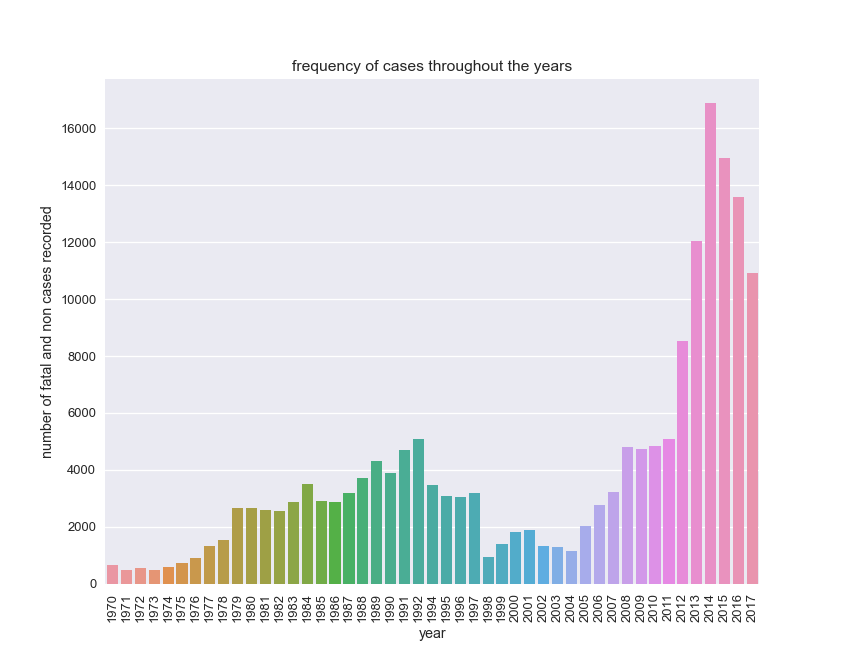

In [65]:
%matplotlib notebook
import seaborn as sns
import matplotlib.pyplot as plt  
plt.style.use('seaborn')
plt.figure(figsize=(9,7))
sns.countplot(x=data['iyear'])
plt.xticks(rotation=90)
plt.xlabel('year')
plt.ylabel('number of fatal and non cases recorded')
plt.title('frequency of cases throughout the years')
plt.show()

<IPython.core.display.Javascript object>


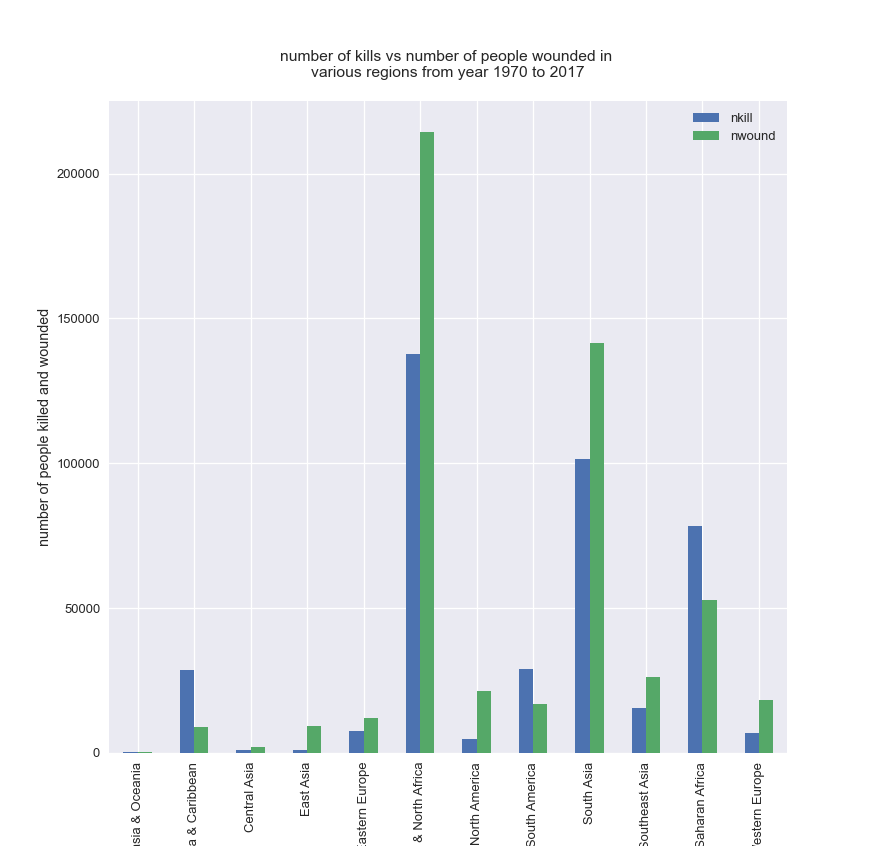

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Australasia & Oceania'),
  Text(1, 0, 'Central America & Caribbean'),
  Text(2, 0, 'Central Asia'),
  Text(3, 0, 'East Asia'),
  Text(4, 0, 'Eastern Europe'),
  Text(5, 0, 'Middle East & North Africa'),
  Text(6, 0, 'North America'),
  Text(7, 0, 'South America'),
  Text(8, 0, 'South Asia'),
  Text(9, 0, 'Southeast Asia'),
  Text(10, 0, 'Sub-Saharan Africa'),
  Text(11, 0, 'Western Europe')])

In [66]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use("seaborn")
pd.DataFrame(data.groupby('region_txt').sum()[['nkill','nwound']]).plot(kind='bar')
plt.xlabel('regions')
plt.ylabel('number of people killed and wounded')
plt.title("""number of kills vs number of people wounded in 
various regions from year 1970 to 2017
          """)
plt.xticks()

<IPython.core.display.Javascript object>


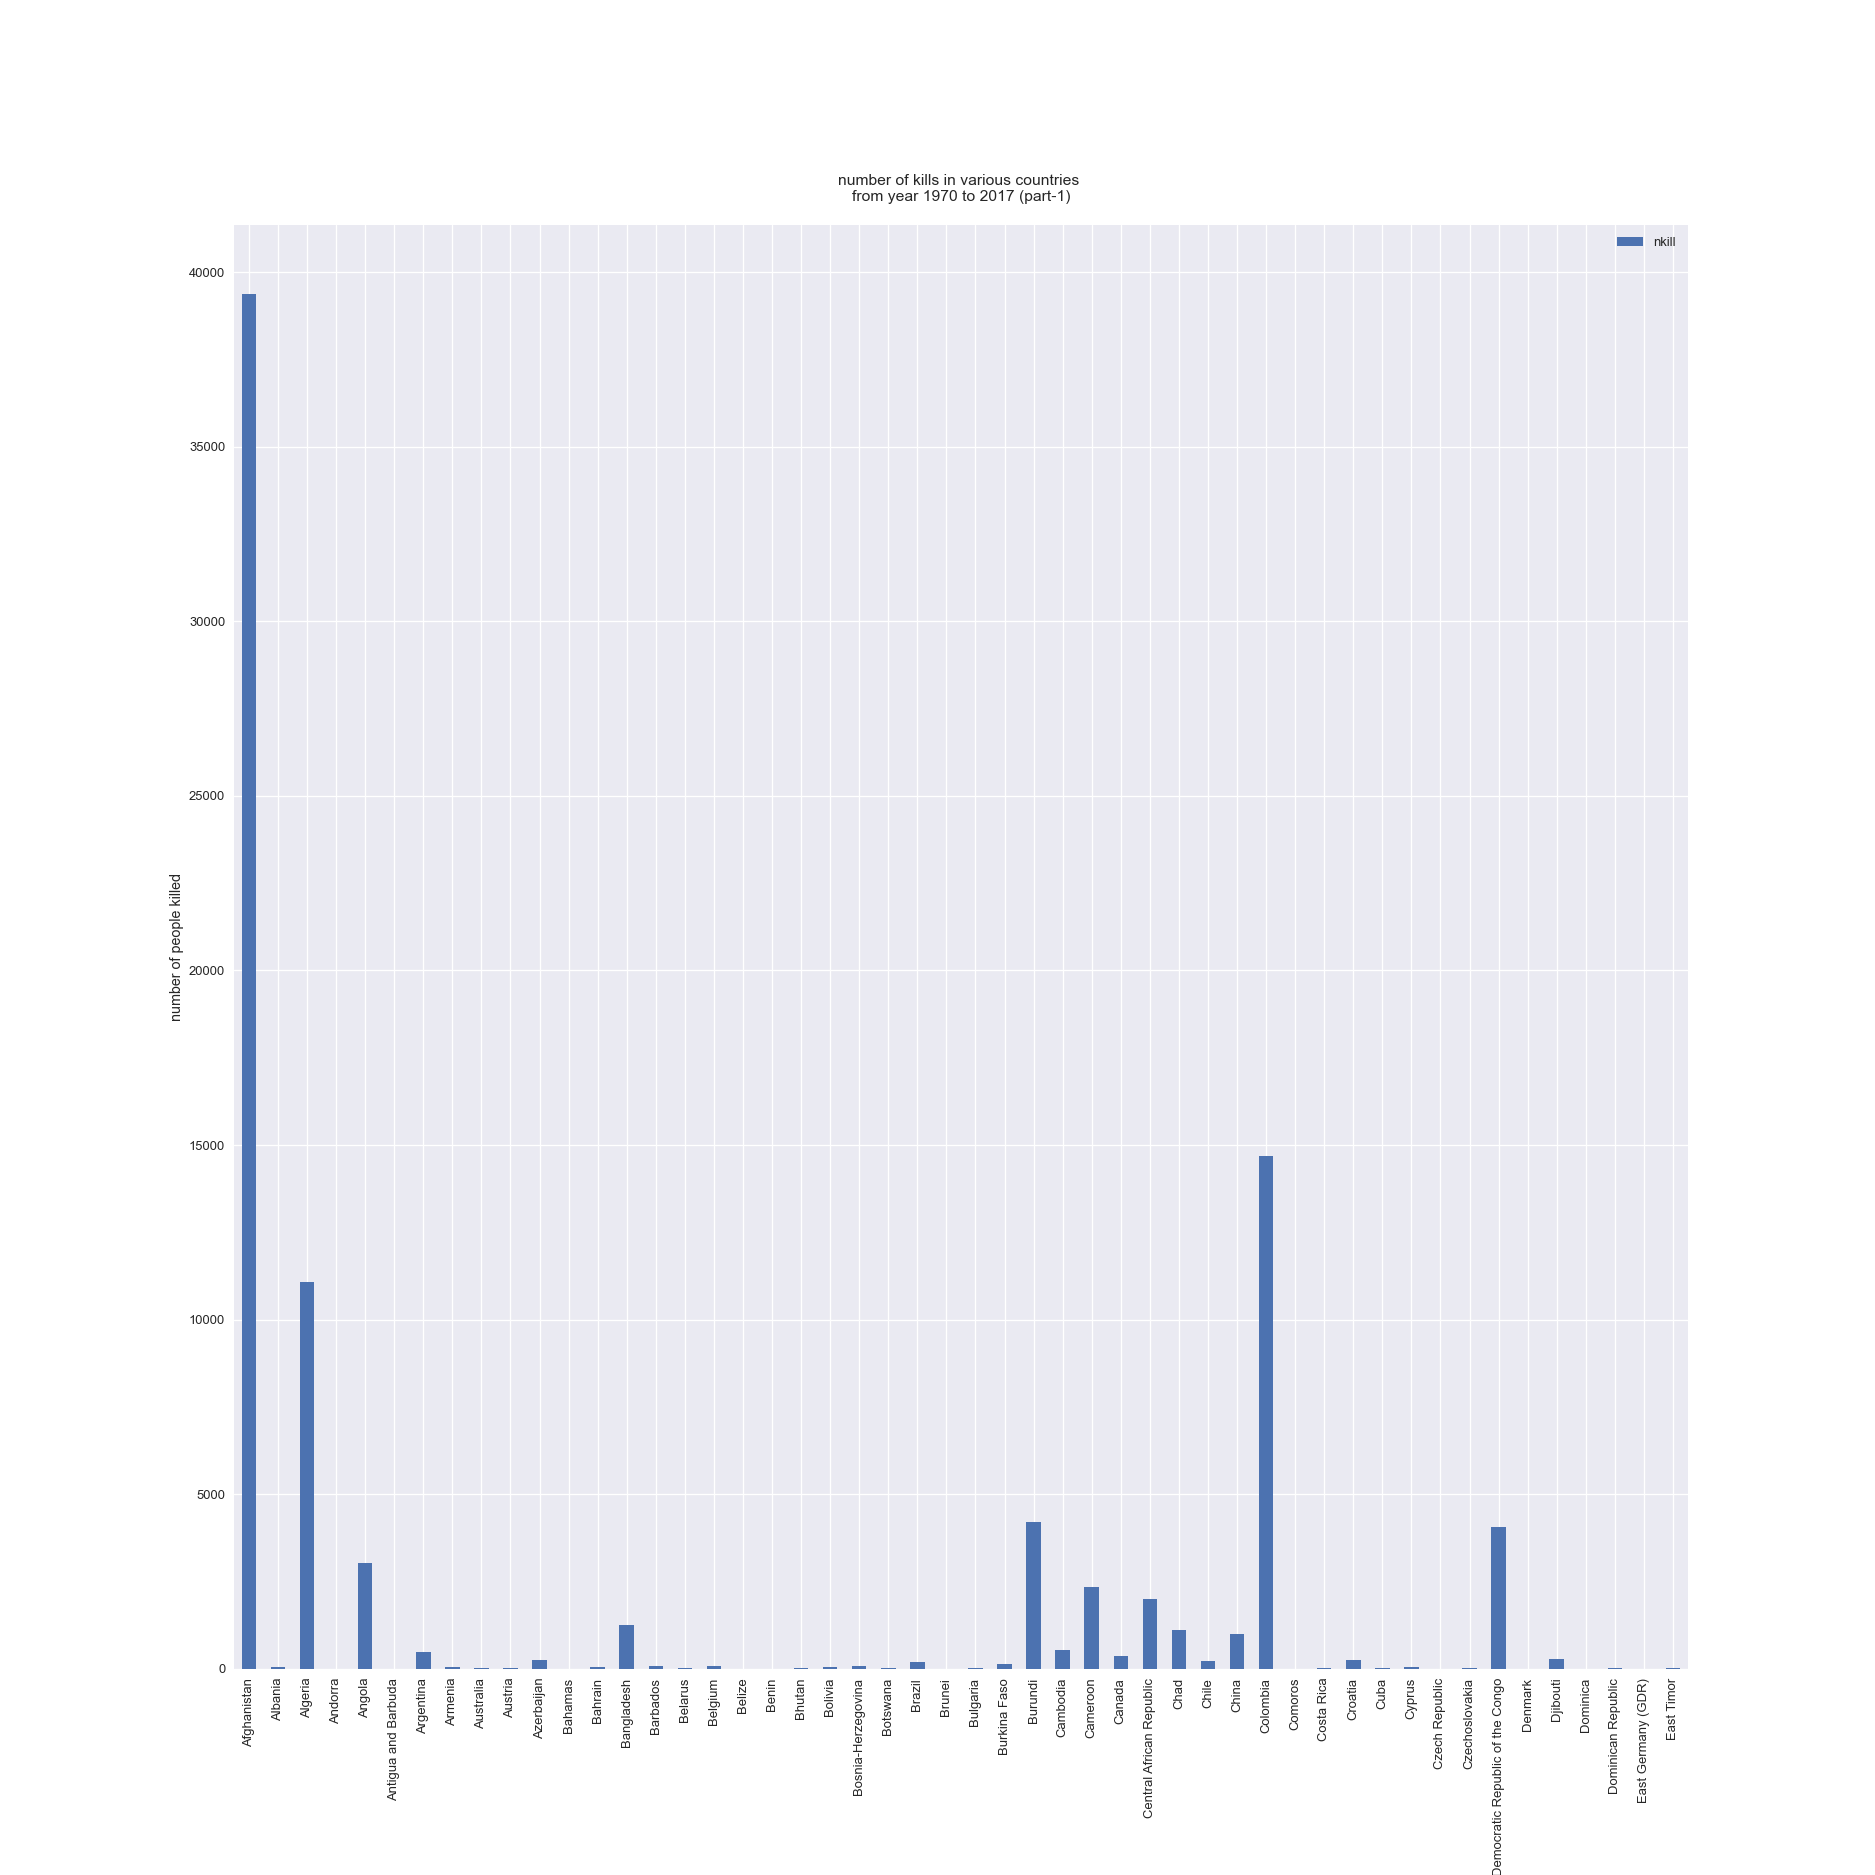

Text(0.5, 1.0, 'number of kills in various countries \nfrom year 1970 to 2017 (part-1)\n          ')

In [147]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use("seaborn")
pd.DataFrame(country_mortality[['nkill']]).plot(kind='bar',figsize=(20,20))
plt.xlabel('countries')
plt.ylabel('number of people killed')
plt.title("""number of kills in various countries 
from year 1970 to 2017 (part-1)
          """)

<IPython.core.display.Javascript object>


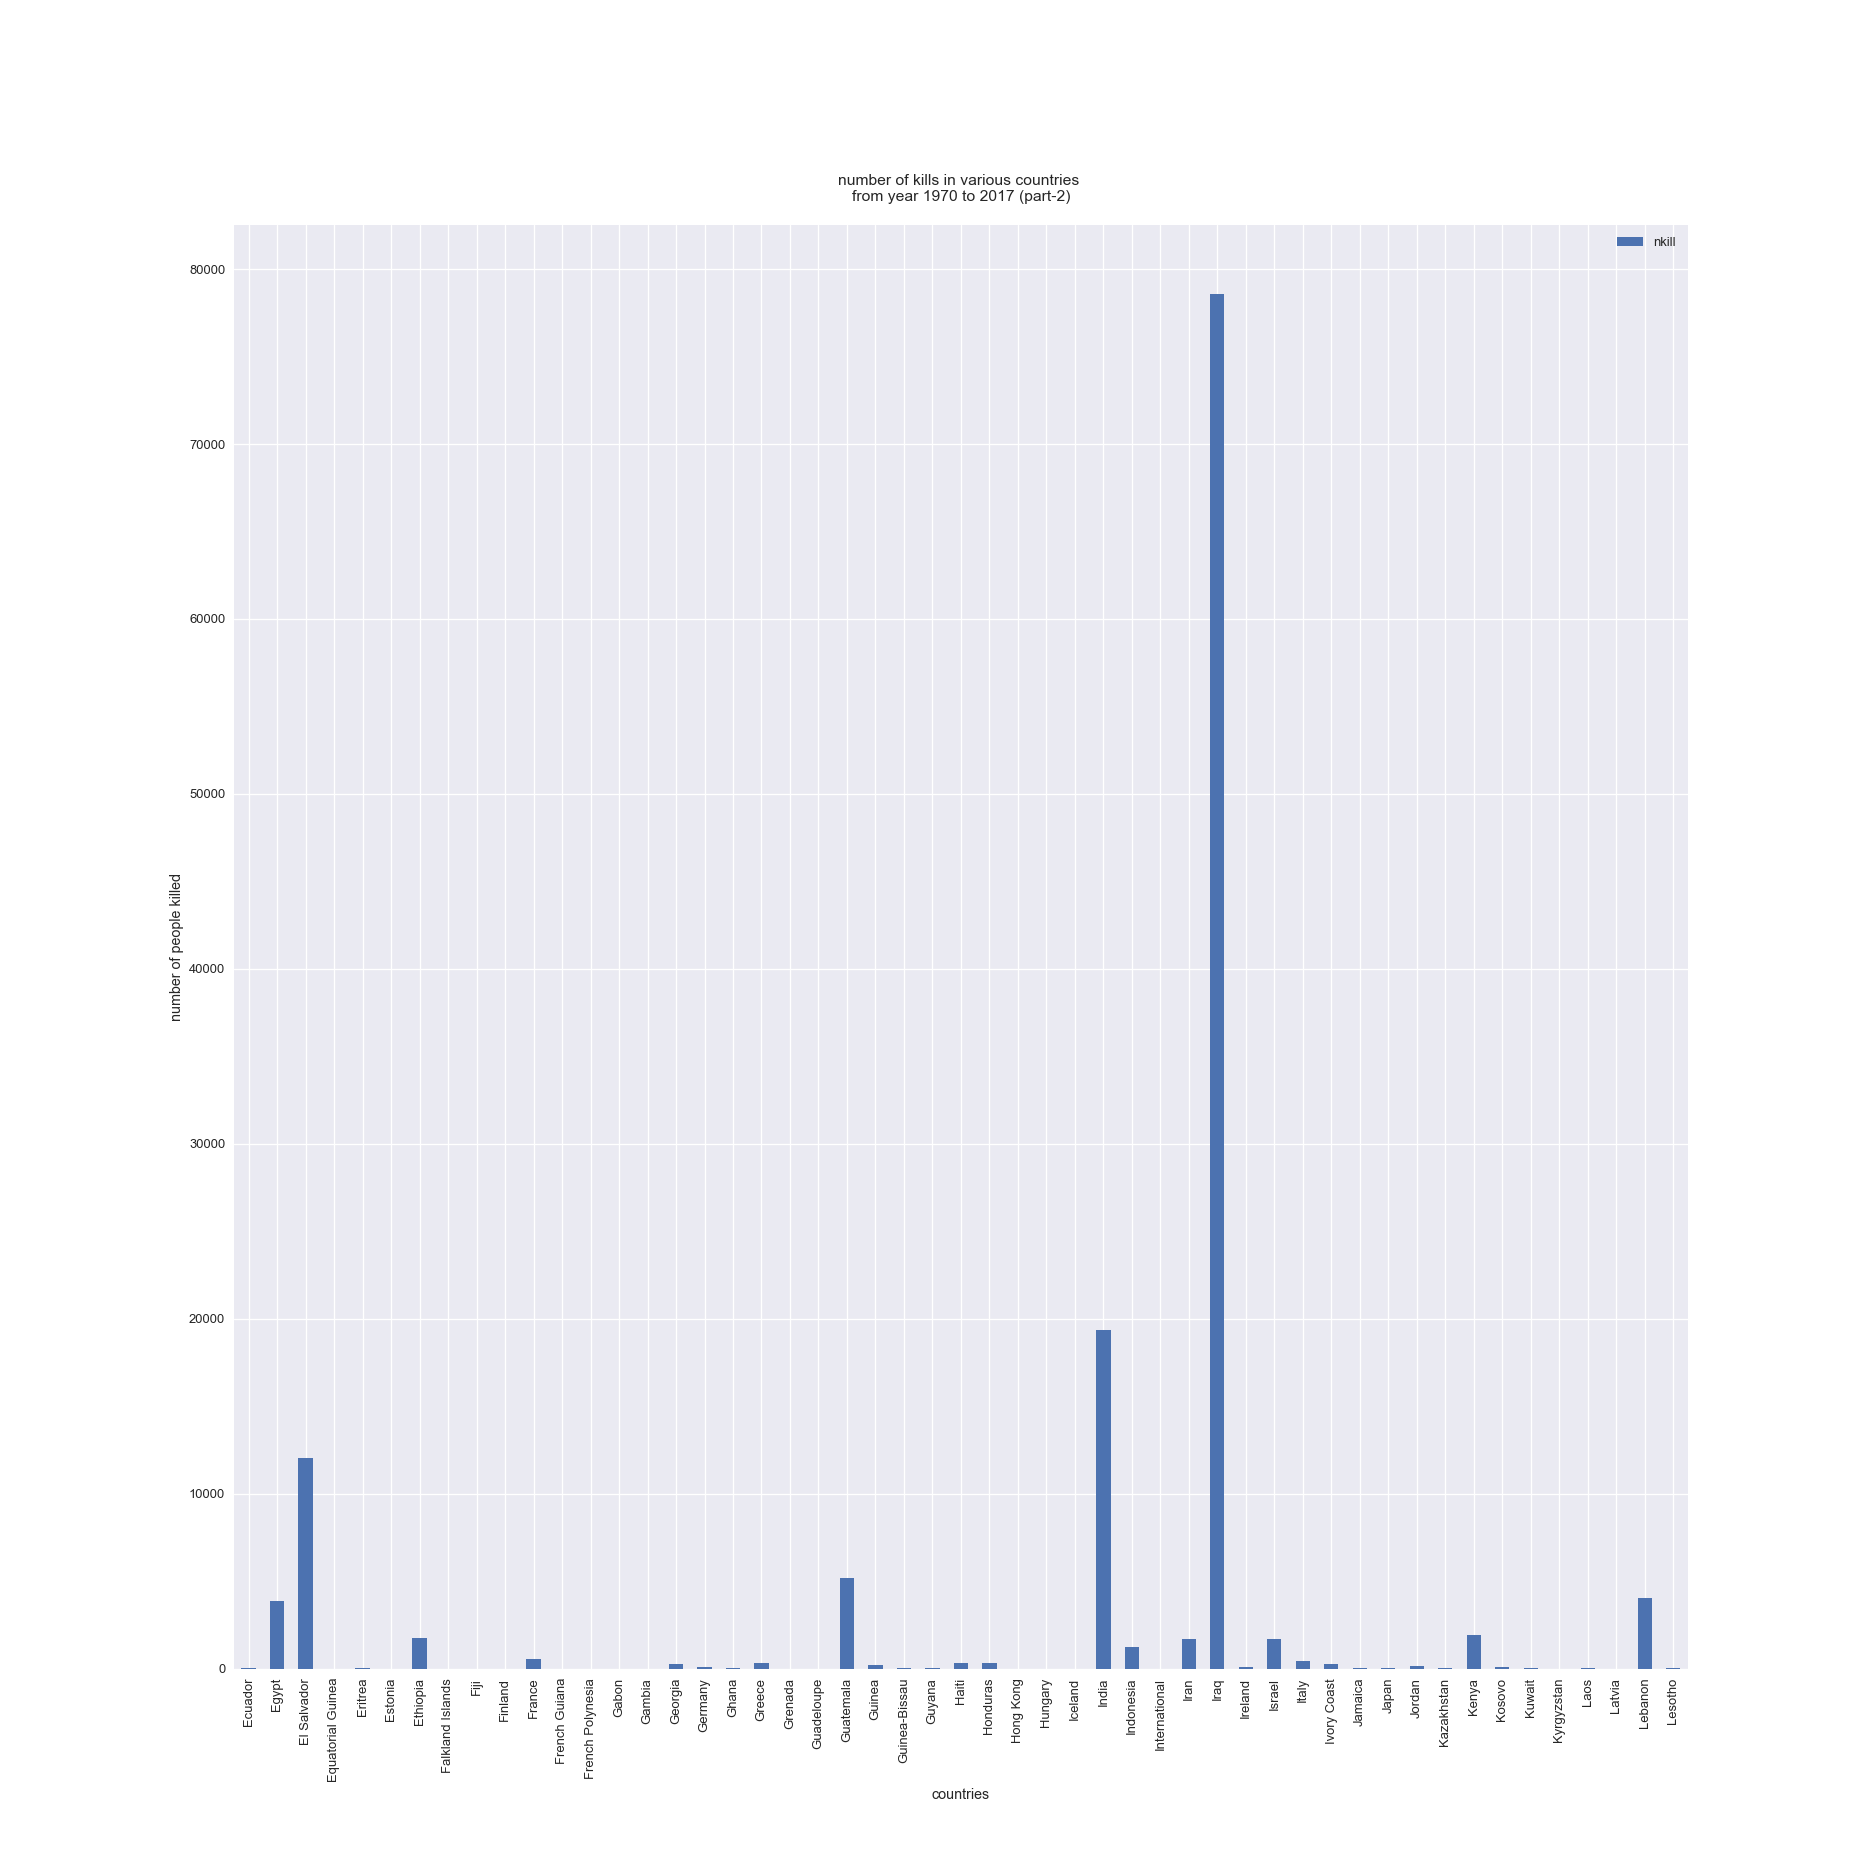

Text(0.5, 1.0, 'number of kills in various countries \nfrom year 1970 to 2017 (part-2)\n          ')

In [143]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use("seaborn")
pd.DataFrame(country_mortality2[['nkill']]).plot(kind='bar',figsize=(20,20))
plt.xlabel('countries')
plt.ylabel('number of people killed')
plt.title("""number of kills in various countries 
from year 1970 to 2017 (part-2)
          """)

<IPython.core.display.Javascript object>


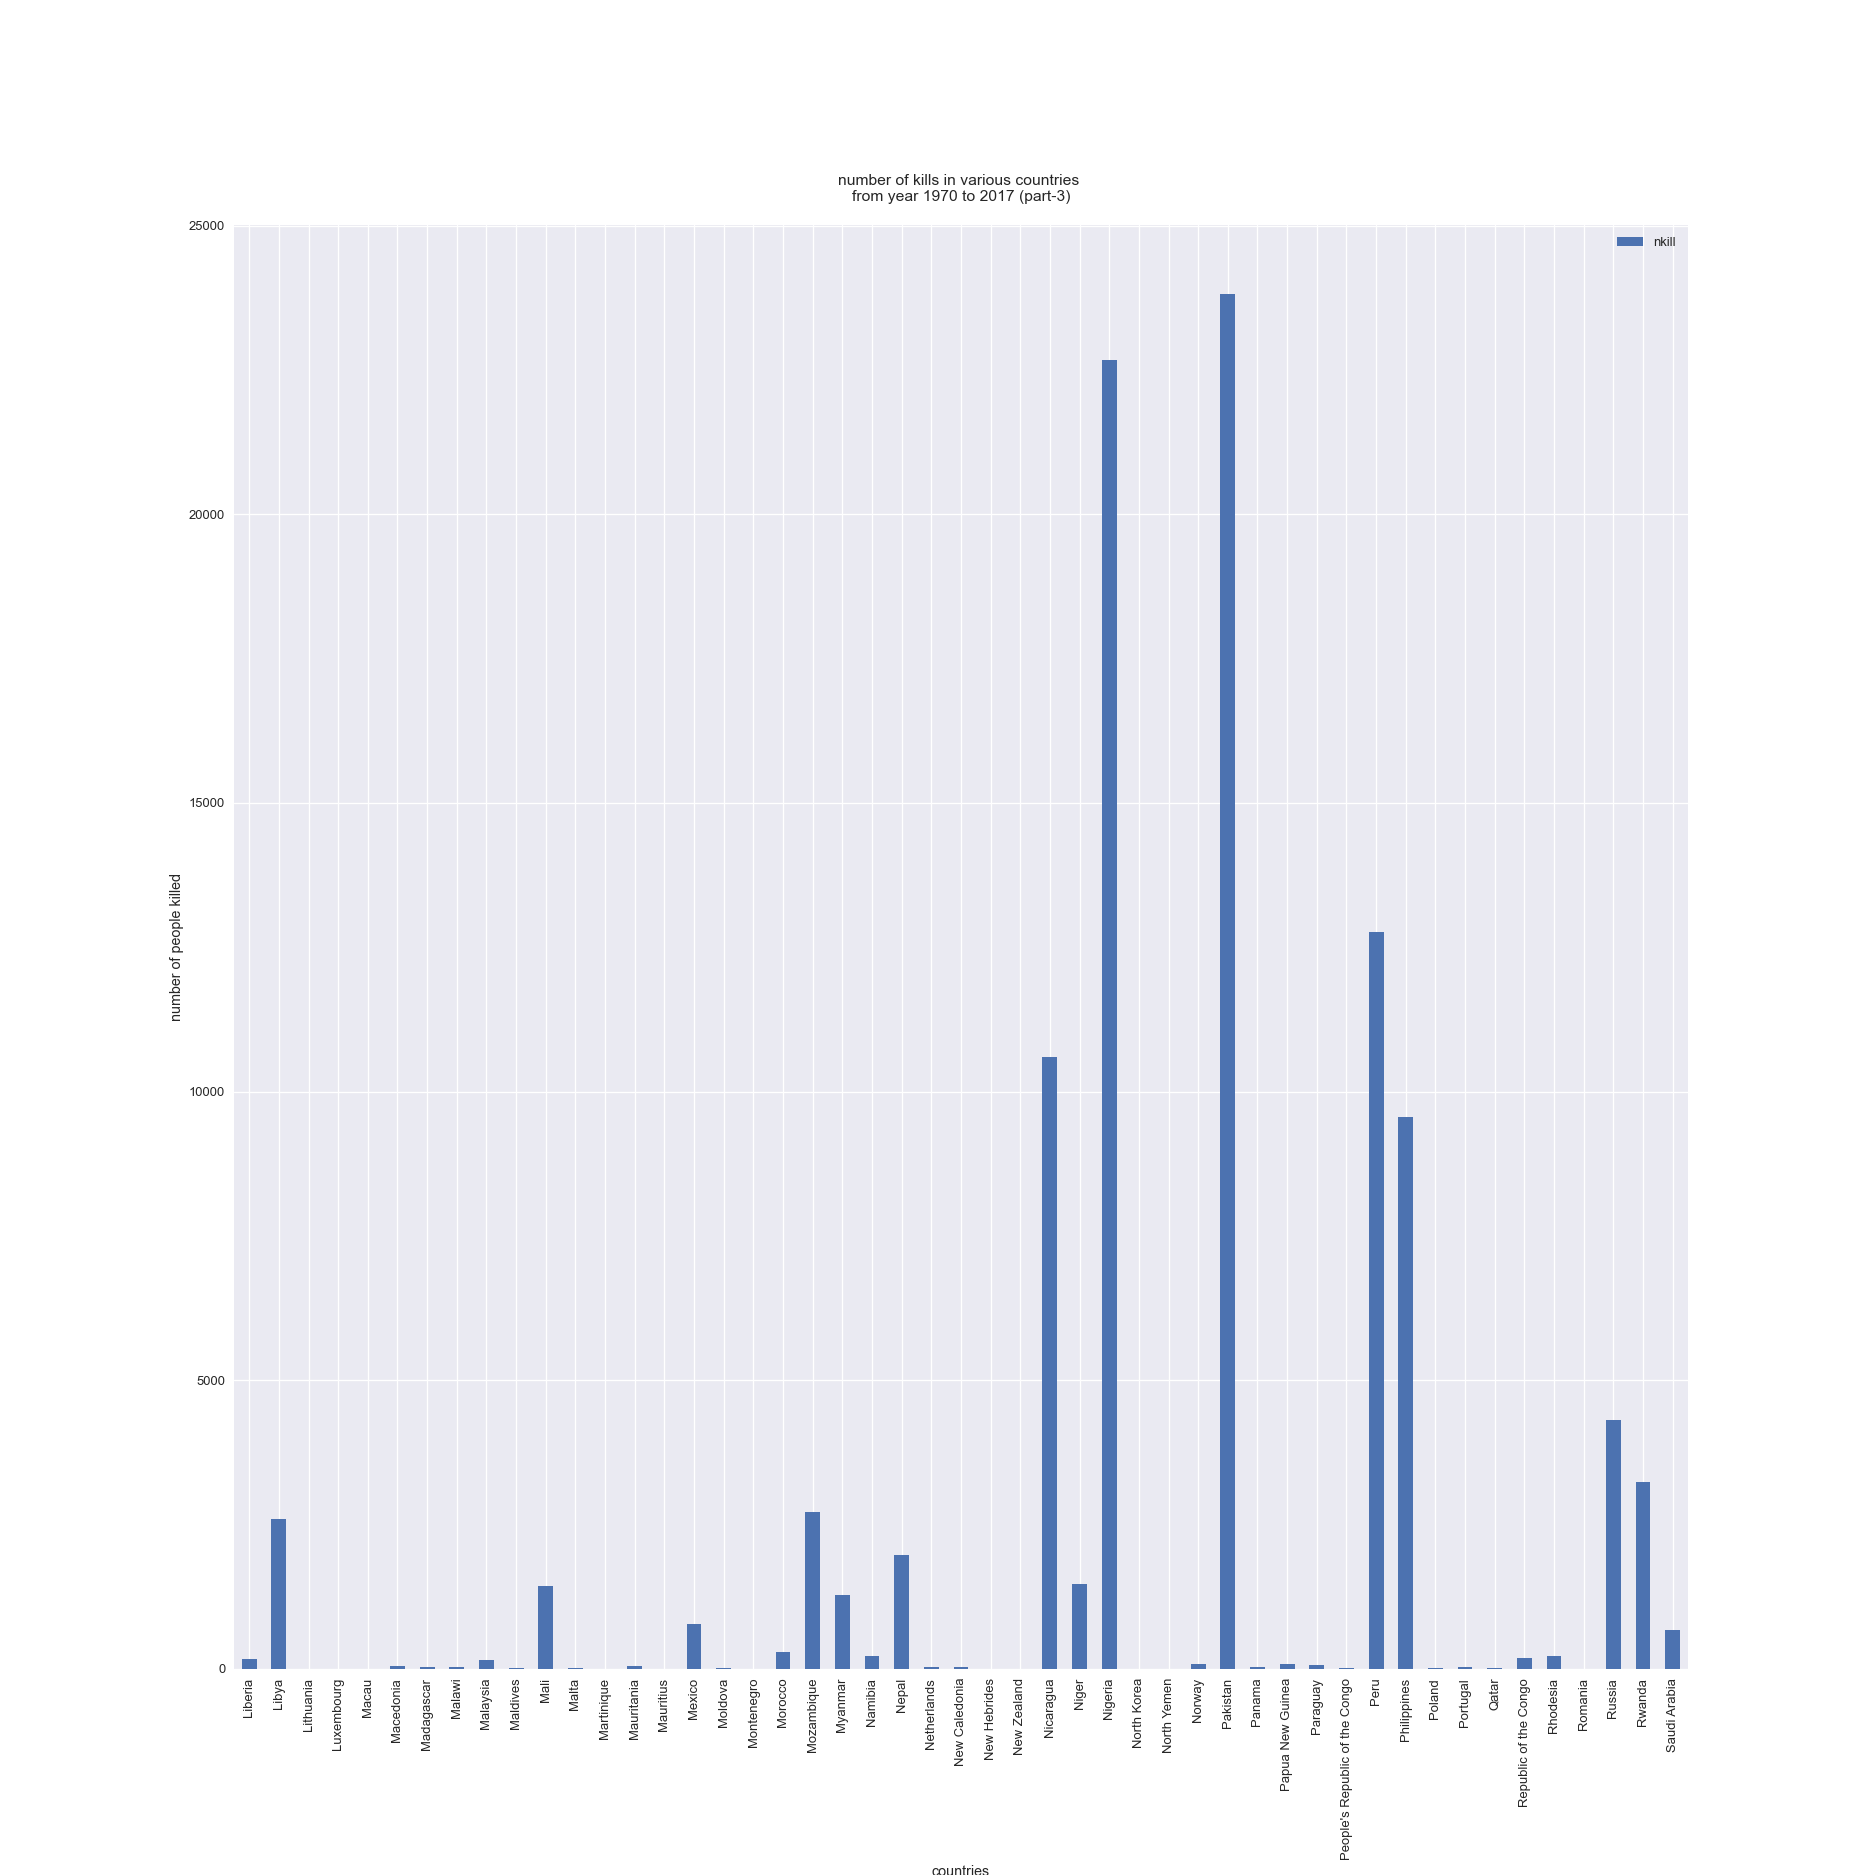

Text(0.5, 1.0, 'number of kills in various countries \nfrom year 1970 to 2017 (part-3)\n          ')

In [146]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
pd.DataFrame(country_mortality3[['nkill']]).plot(kind='bar',figsize=(20,20))
plt.xlabel('countries')
plt.ylabel('number of people killed')
plt.title("""number of kills in various countries 
from year 1970 to 2017 (part-3)
          """)

<IPython.core.display.Javascript object>


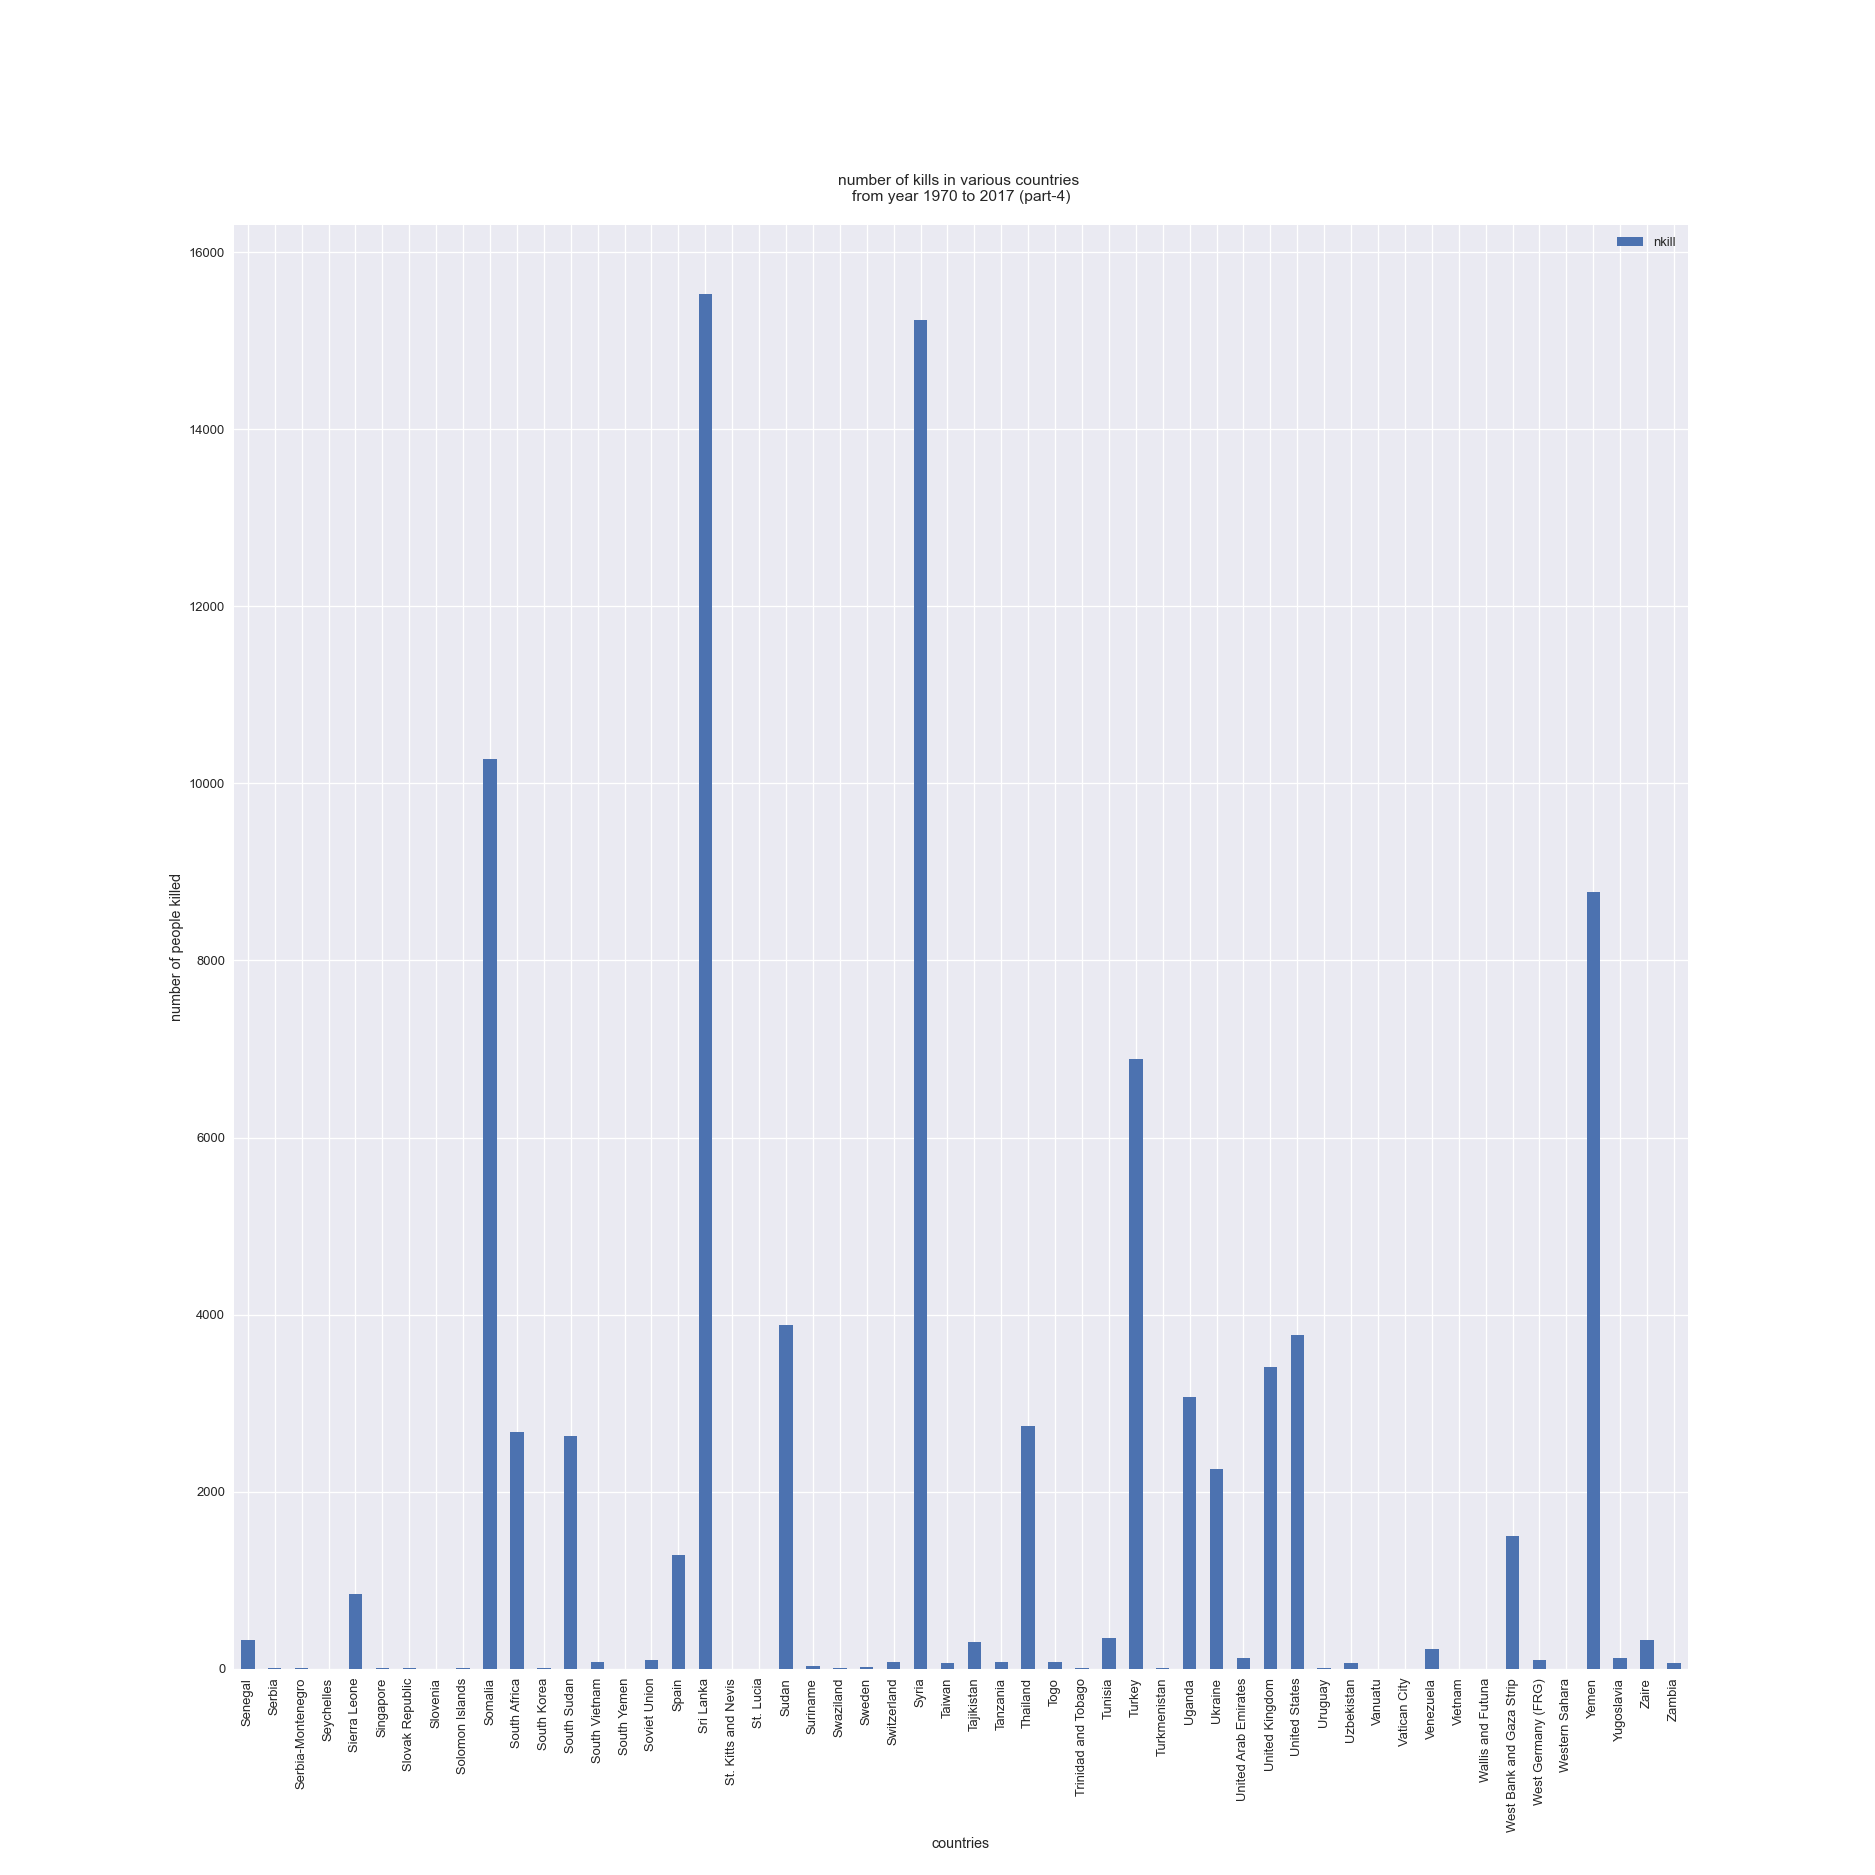

Text(0.5, 1.0, 'number of kills in various countries \nfrom year 1970 to 2017 (part-4)\n          ')

In [148]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use("seaborn")
pd.DataFrame(country_mortality4[['nkill']]).plot(kind='bar',figsize=(20,20))
plt.xlabel('countries')
plt.ylabel('number of people killed')
plt.title("""number of kills in various countries 
from year 1970 to 2017 (part-4)
          """)

<IPython.core.display.Javascript object>


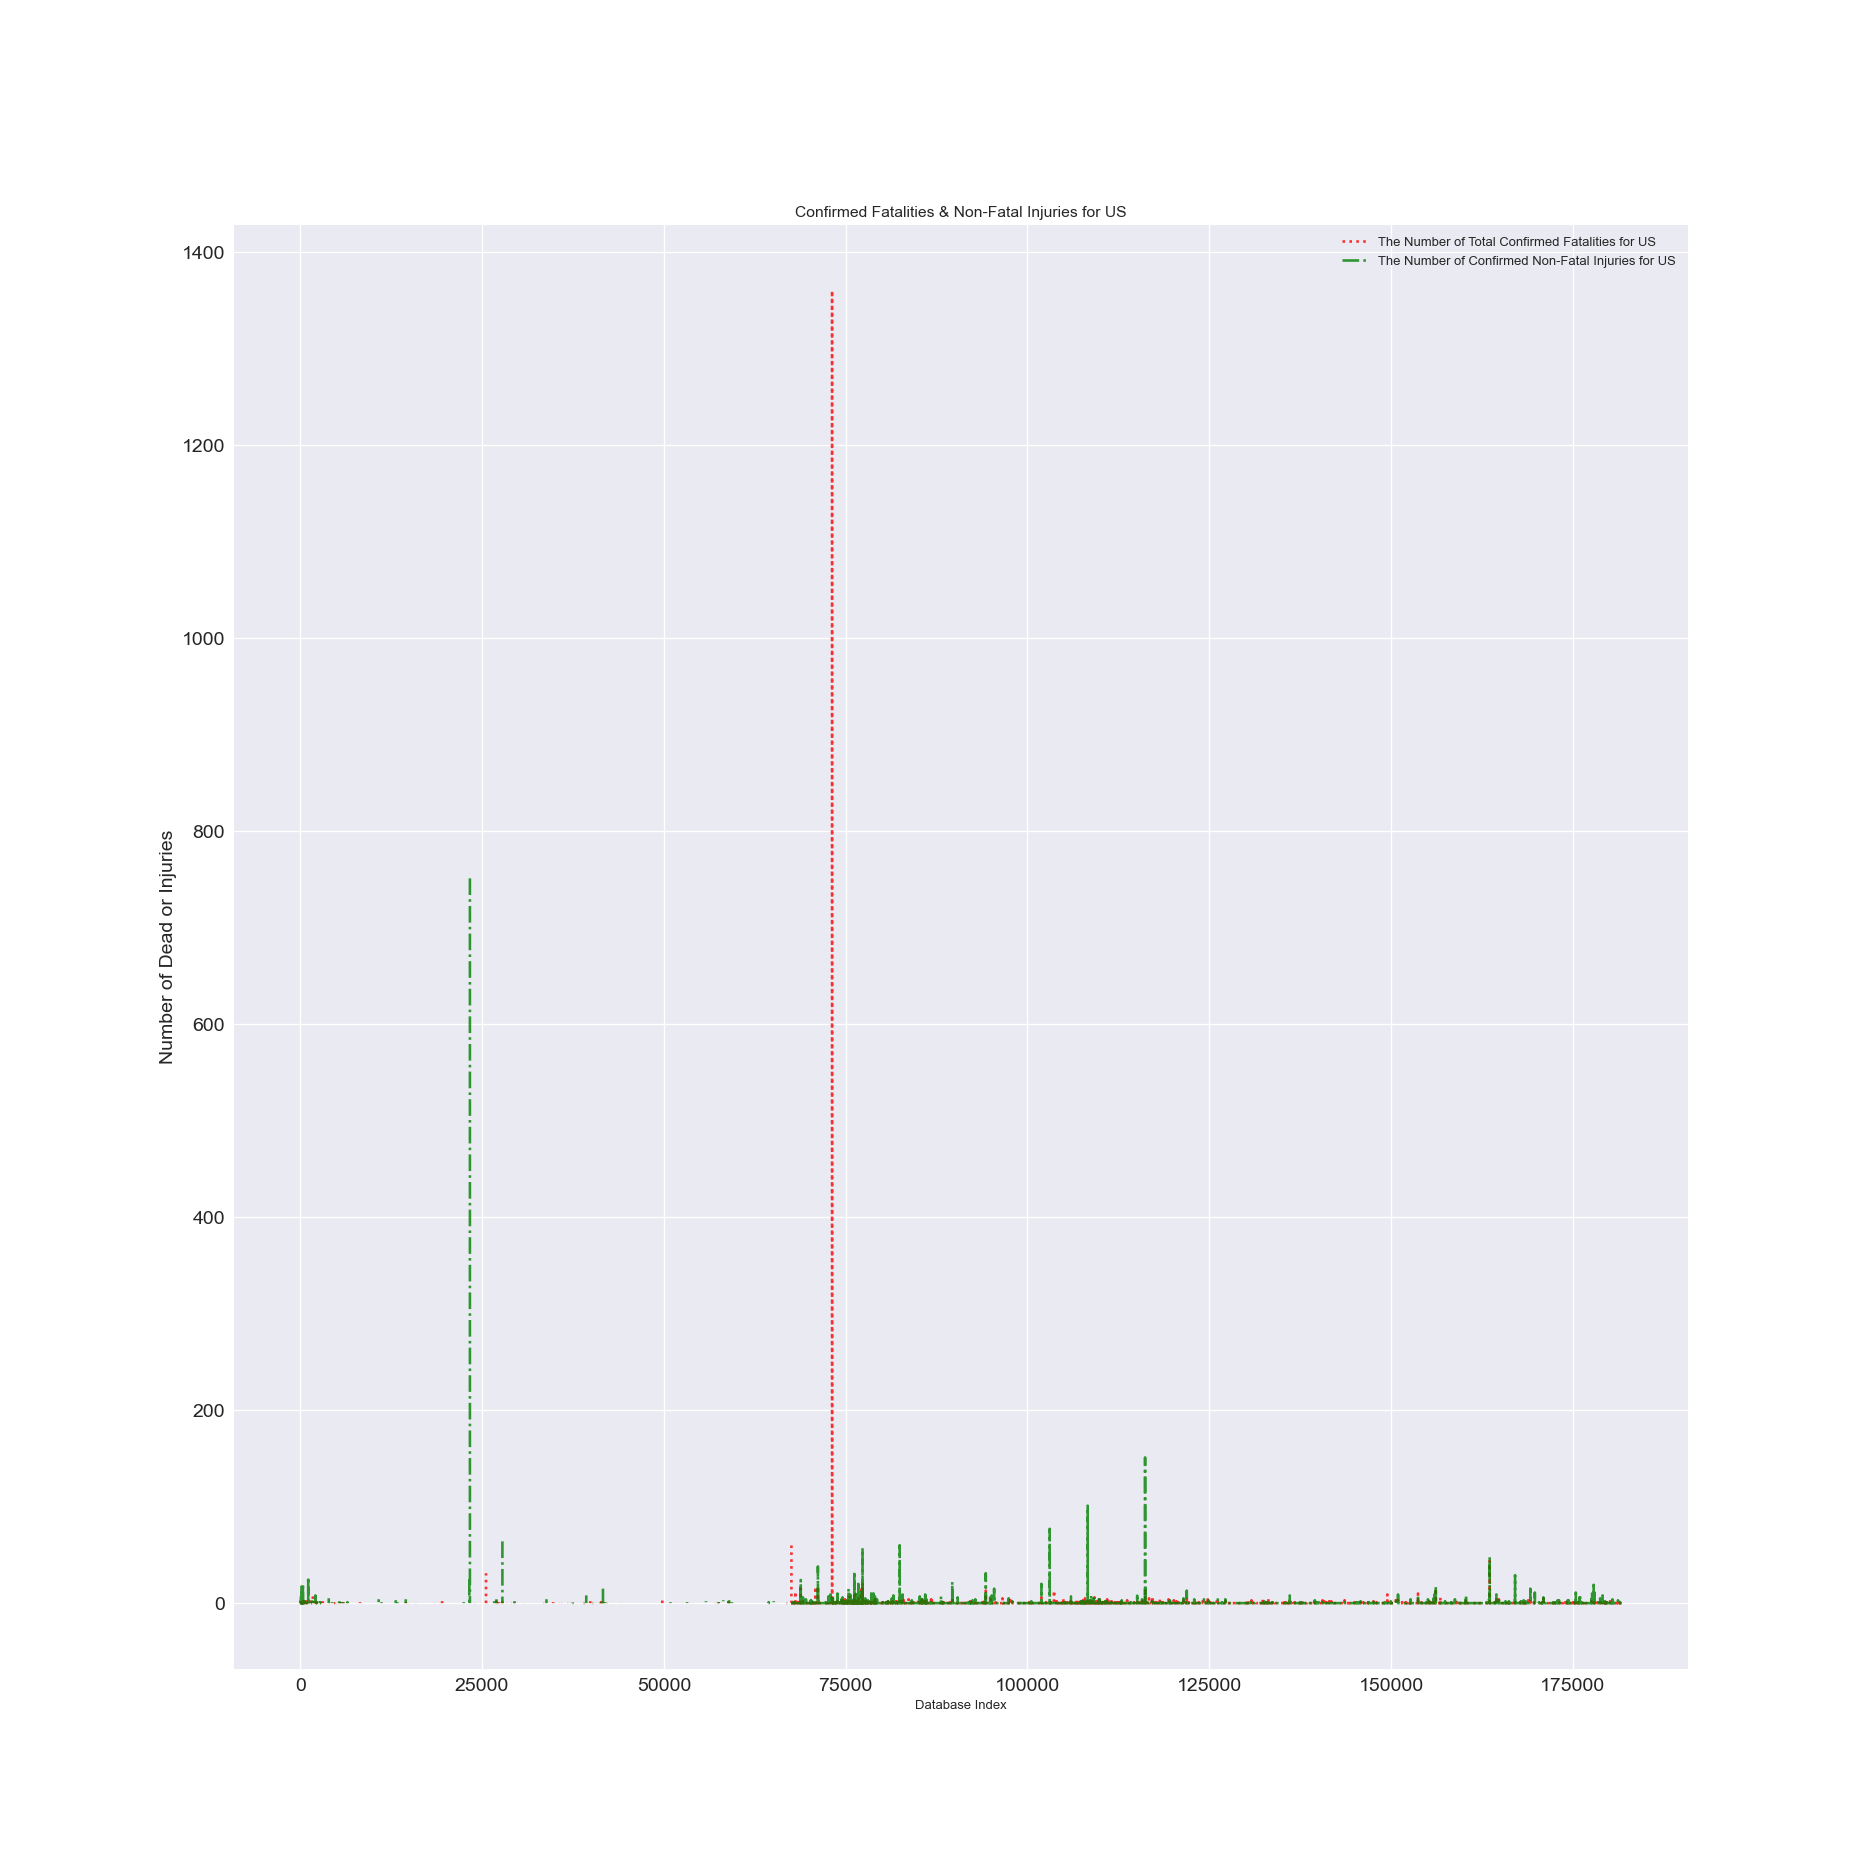

In [108]:
#US TERROR ATTACKS AND DEATH INJURIES
%matplotlib notebook
plt.figure()
data.nkillus.plot(kind = 'line', color = 'red', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
data.nwoundus.plot(color = "green", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=10)              # label = name of label
plt.ylabel('Number of Dead or Injuries', fontsize=15)

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')            #plot title
plt.show()

<IPython.core.display.Javascript object>


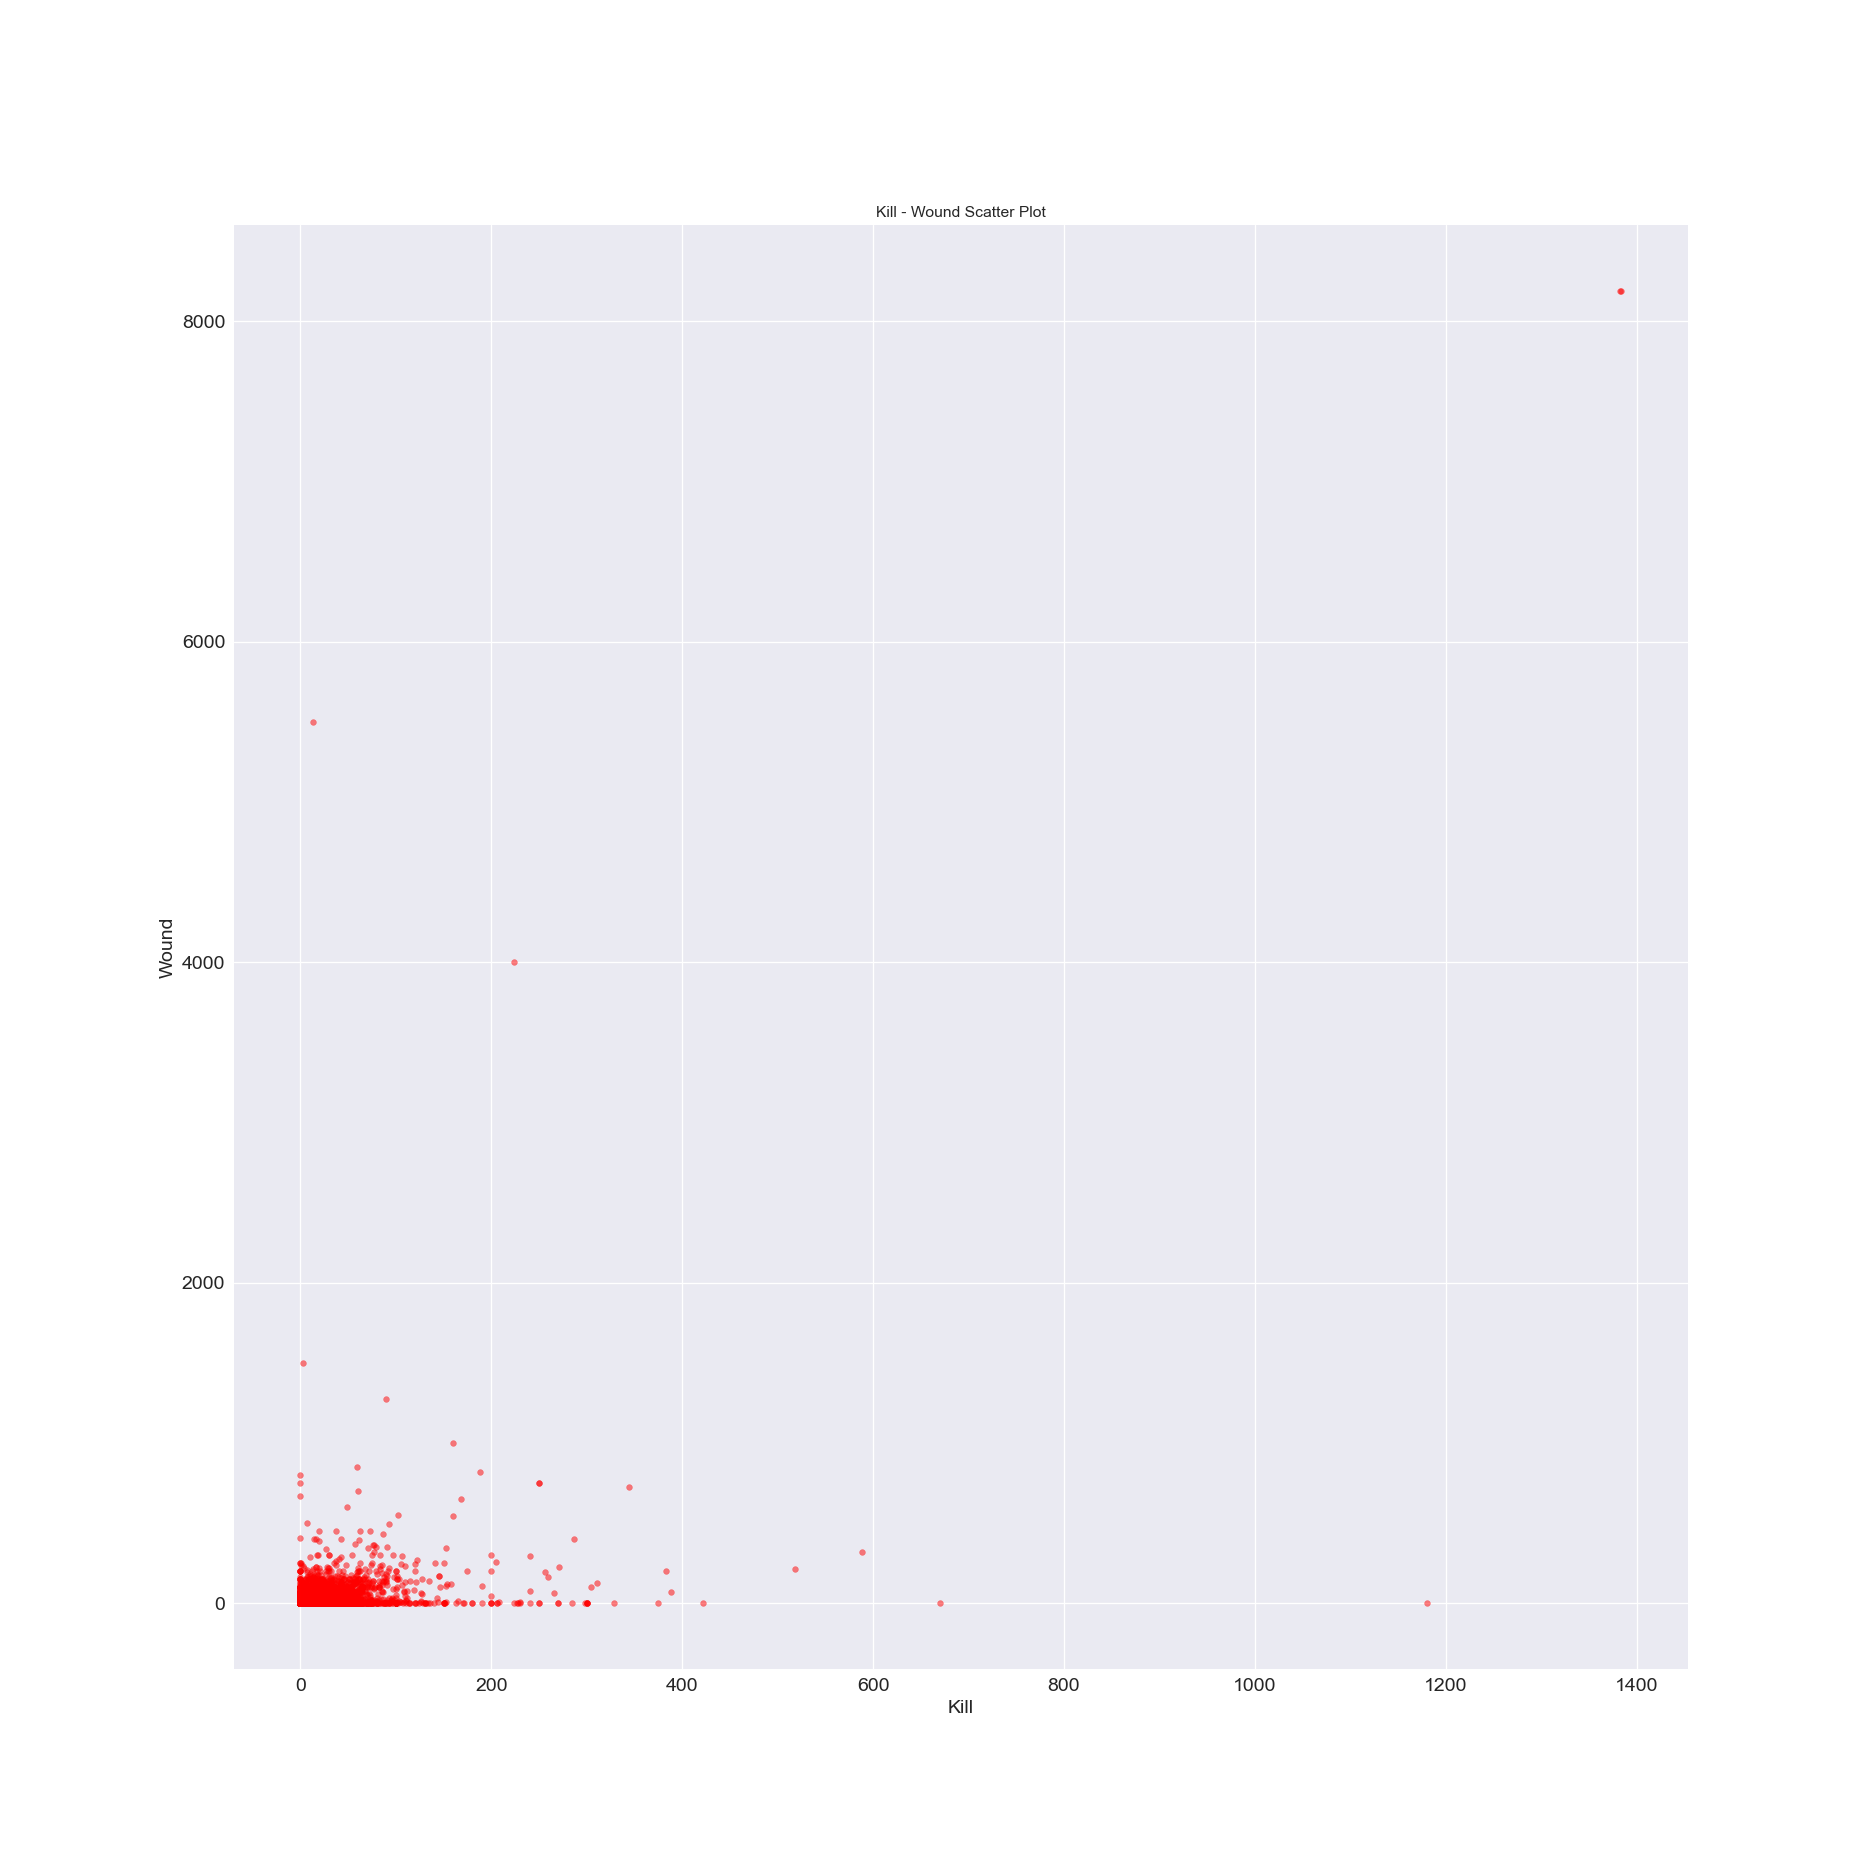

In [118]:
data.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'red', figsize = (20,20), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()


# conclusion

In [166]:
nkills = pd.DataFrame(data.groupby('region_txt').sum()[['nkill','nwound']])
nkills.sort_values(by='nkill',inplace = True, ascending = False)
print("regions with the highest number of kills:\n")
print(nkills[:5])
print('*'*70)
print("countries with the Lowest number of kills:\n")
print(nkills[-5:])

regions with the highest number of kills:

                                nkill    nwound
region_txt                                     
Middle East & North Africa   137642.0  214308.0
South Asia                   101319.0  141360.0
Sub-Saharan Africa            78386.0   52857.0
South America                 28849.0   16704.0
Central America & Caribbean   28708.0    8991.0
**********************************************************************
countries with the Lowest number of kills:

                        nkill   nwound
region_txt                            
Western Europe         6694.0  18332.0
North America          4916.0  21531.0
East Asia              1152.0   9213.0
Central Asia           1000.0   2009.0
Australasia & Oceania   150.0    260.0


*the region of middle east and north africa are very much vulerable to terrorism while south asia being the second most vulnerable region to terrorism*

In [164]:
nkills = pd.DataFrame(data.groupby('country_txt').sum()[['nkill','nwound']])
nkills.sort_values(by='nkill',inplace = True, ascending = False)
print("counties with the highest number of kills:\n")
print(nkills[:10])
print('*'*70)
print("countries with the Lowest number of kills:\n")
print(nkills[-10:])

counties with the highest number of kills:

               nkill    nwound
country_txt                   
Iraq         78589.0  134690.0
Afghanistan  39384.0   44277.0
Pakistan     23822.0   42038.0
Nigeria      22682.0   10239.0
India        19341.0   28980.0
Sri Lanka    15530.0   15561.0
Syria        15229.0   14109.0
Colombia     14698.0   10328.0
Peru         12771.0    4078.0
El Salvador  12053.0    5062.0
**********************************************************************
countries with the Lowest number of kills:

                     nkill  nwound
country_txt                       
Antigua and Barbuda    0.0     0.0
Seychelles             0.0     0.0
Mauritius              0.0     1.0
Luxembourg             0.0     6.0
Benin                  0.0     8.0
St. Kitts and Nevis    0.0     9.0
Martinique             0.0     1.0
Brunei                 0.0     1.0
Iceland                0.0     0.0
South Yemen            0.0     2.0


*countries like afganistan ,iraq and pakistan are very much vulerable to terrorism while countries like iceland, south yemen and mauritius have very little to no terrorism at all*

*In the majority of acts of terrorism, the mortality rate and injuries were low, but a small number of actions led to too many deaths and injuries.*